In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
np.set_printoptions(threshold=np.inf)

from autoviz.AutoViz_Class import AutoViz_Class
%matplotlib inline

import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV, learning_curve, KFold, RandomizedSearchCV, cross_validate
from sklearn.metrics import mean_squared_error, r2_score
from prettytable import PrettyTable
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from yellowbrick.datasets import load_occupancy
from yellowbrick.model_selection import FeatureImportances

Imported v0.1.58. After importing, execute '%matplotlib inline' to display charts in Jupyter.
    AV = AutoViz_Class()
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
Update: verbose=0 displays charts in your local Jupyter notebook.
        verbose=1 additionally provides EDA data cleaning suggestions. It also displays charts.
        verbose=2 does not display charts but saves them in AutoViz_Plots folder in local machine.
        chart_format='bokeh' displays charts in your local Jupyter notebook.
        chart_format='server' displays charts in your browser: one tab for each chart type
        chart_format='html' silently saves interactive HTML files in your local machine


In [22]:
car_data = pd.read_csv("car-assignments.csv")
car_data = car_data.astype({'CarID': 'float', 'CurrentEmploymentType':'category', 'CurrentEmploymentTitle':'category'})
car_data.info()
car_data.head(8)
car_data.to_pickle('car_df.pkl')
car_data.to_csv('car_df.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   LastName                44 non-null     object  
 1   FirstName               44 non-null     object  
 2   CarID                   35 non-null     float64 
 3   CurrentEmploymentType   44 non-null     category
 4   CurrentEmploymentTitle  44 non-null     category
dtypes: category(2), float64(1), object(2)
memory usage: 2.2+ KB


In [3]:
credit_data = pd.read_csv("cc_data.csv", encoding='cp1252')
credit_data = credit_data.astype({'location':'category'})
credit_data['timestamp'] = pd.to_datetime(credit_data['timestamp'], infer_datetime_format=True)
credit_data.info()
credit_data.head(8)
credit_data.to_pickle('credit_df.pkl')
credit_data.to_csv('credit_df.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1491 entries, 0 to 1490
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  1491 non-null   datetime64[ns]
 1   location   1491 non-null   category      
 2   price      1491 non-null   float64       
 3   FirstName  1491 non-null   object        
 4   LastName   1491 non-null   object        
dtypes: category(1), datetime64[ns](1), float64(1), object(2)
memory usage: 49.5+ KB


In [4]:
loyalty_data = pd.read_csv("loyalty_data.csv", encoding='cp1252')
loyalty_data['timestamp'] = pd.to_datetime(loyalty_data['timestamp'], infer_datetime_format=True)
loyalty_data = loyalty_data.astype({'location': 'category'})
loyalty_data.info()
loyalty_data.head(8)
loyalty_data.to_pickle('loyalty_df.pkl')
loyalty_data.to_csv('loyalty_df.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393 entries, 0 to 1392
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  1393 non-null   datetime64[ns]
 1   location   1393 non-null   category      
 2   price      1393 non-null   float64       
 3   FirstName  1393 non-null   object        
 4   LastName   1393 non-null   object        
dtypes: category(1), datetime64[ns](1), float64(1), object(2)
memory usage: 46.3+ KB


In [23]:
gps_data = pd.read_csv("gps.csv", encoding='cp1252')
gps_data['Timestamp'] = pd.to_datetime(gps_data['Timestamp'], infer_datetime_format=True)
gps_data = gps_data.astype({'id': 'float'})
# gps_data = gps_data.astype({'id': 'category'})
gps_data.rename(columns={'id':'CarID'}, inplace=True)
gps_data.info()
gps_data.head(8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685169 entries, 0 to 685168
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Timestamp  685169 non-null  datetime64[ns]
 1   CarID      685169 non-null  float64       
 2   lat        685169 non-null  float64       
 3   long       685169 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 20.9 MB


Timestamp  CarID        lat       long
0 2014-01-06 06:28:01   35.0  36.076225  24.874689
1 2014-01-06 06:28:01   35.0  36.076220  24.874596
2 2014-01-06 06:28:03   35.0  36.076211  24.874443
3 2014-01-06 06:28:05   35.0  36.076217  24.874253
4 2014-01-06 06:28:06   35.0  36.076214  24.874167
5 2014-01-06 06:28:07   35.0  36.076191  24.874056
6 2014-01-06 06:28:09   35.0  36.076194  24.873906
7 2014-01-06 06:28:10   35.0  36.076183  24.873814

In [6]:
car_df = pd.read_pickle('car_df.pkl')
credit_df = pd.read_pickle('credit_df.pkl')
loyalty_df = pd.read_pickle('loyalty_df.pkl')

In [14]:
car_df.shape

(44, 5)

In [15]:
gps_data.shape

(685169, 4)

In [26]:
gps_data.reset_index()
car_df.reset_index()
car_gps_df = pd.merge(gps_data, car_df, left_on='CarID', right_on='CarID', how='left')
print(car_df[car_df['CarID'] == 35.0])
car_gps_df.head()

      LastName FirstName CarID CurrentEmploymentType  \
34  Vasco-Pais    Willem  35.0             Executive   

          CurrentEmploymentTitle  
34  Environmental Safety Advisor  


Timestamp CarID        lat       long    LastName FirstName  \
0 2014-01-06 06:28:01  35.0  36.076225  24.874689  Vasco-Pais    Willem   
1 2014-01-06 06:28:01  35.0  36.076220  24.874596  Vasco-Pais    Willem   
2 2014-01-06 06:28:03  35.0  36.076211  24.874443  Vasco-Pais    Willem   
3 2014-01-06 06:28:05  35.0  36.076217  24.874253  Vasco-Pais    Willem   
4 2014-01-06 06:28:06  35.0  36.076214  24.874167  Vasco-Pais    Willem   

  CurrentEmploymentType        CurrentEmploymentTitle  
0             Executive  Environmental Safety Advisor  
1             Executive  Environmental Safety Advisor  
2             Executive  Environmental Safety Advisor  
3             Executive  Environmental Safety Advisor  
4             Executive  Environmental Safety Advisor

In [8]:
car_gps_df.to_pickle('gps_df.pkl')
car_gps_df.to_csv('gps_df.csv')

    max_rows_analyzed is smaller than dataset shape 685169...
        randomly sampled 150000 rows from read CSV file
Shape of your Data Set loaded: (150000, 9)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


    9 Predictors classified...
        1 variables removed since they were ID or low-information variables
        List of variables removed: ['Unnamed: 0']
Since Number of Rows in data 150000 exceeds maximum, randomly sampling 150000 rows for EDA...
Number of All Scatter Plots = 6


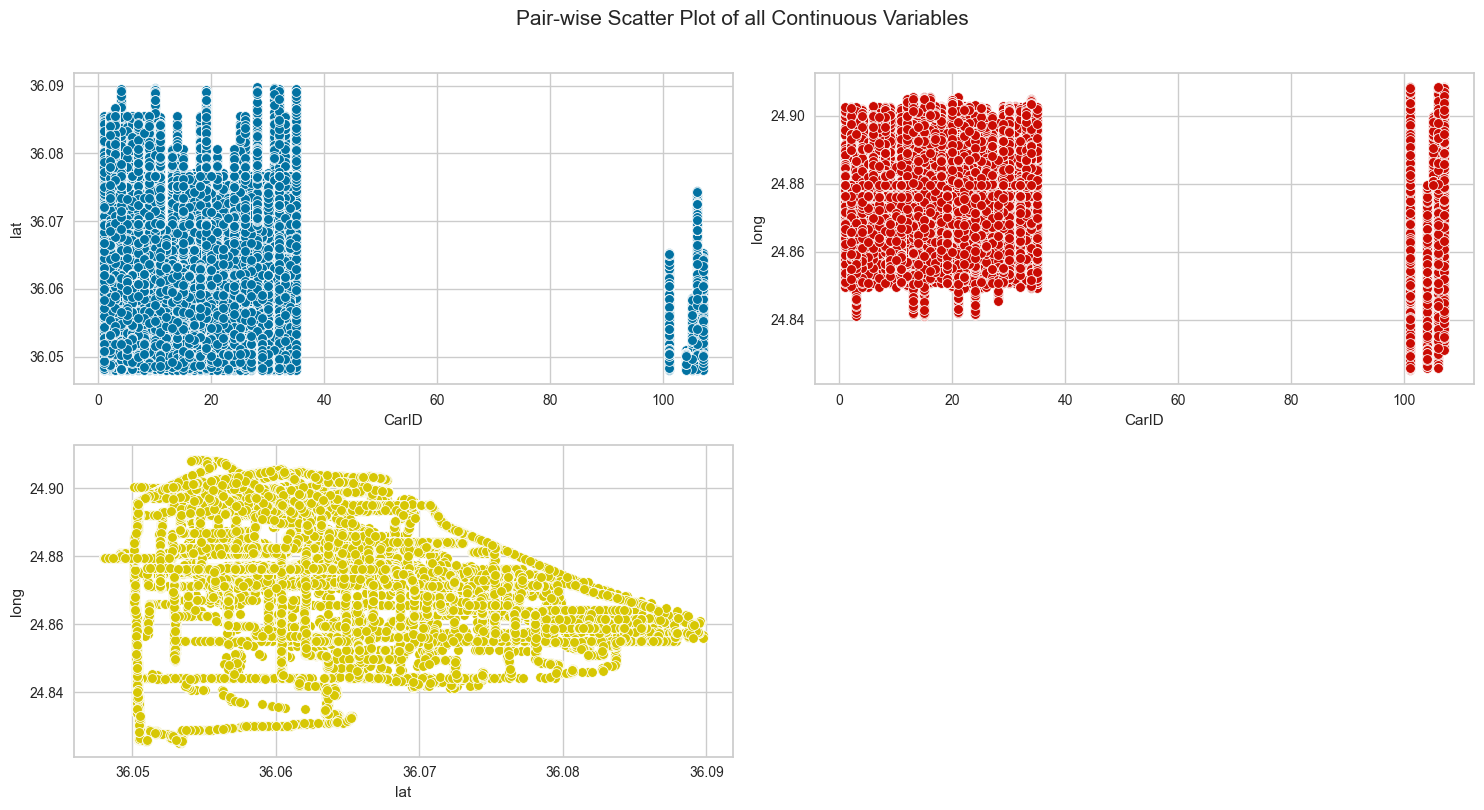

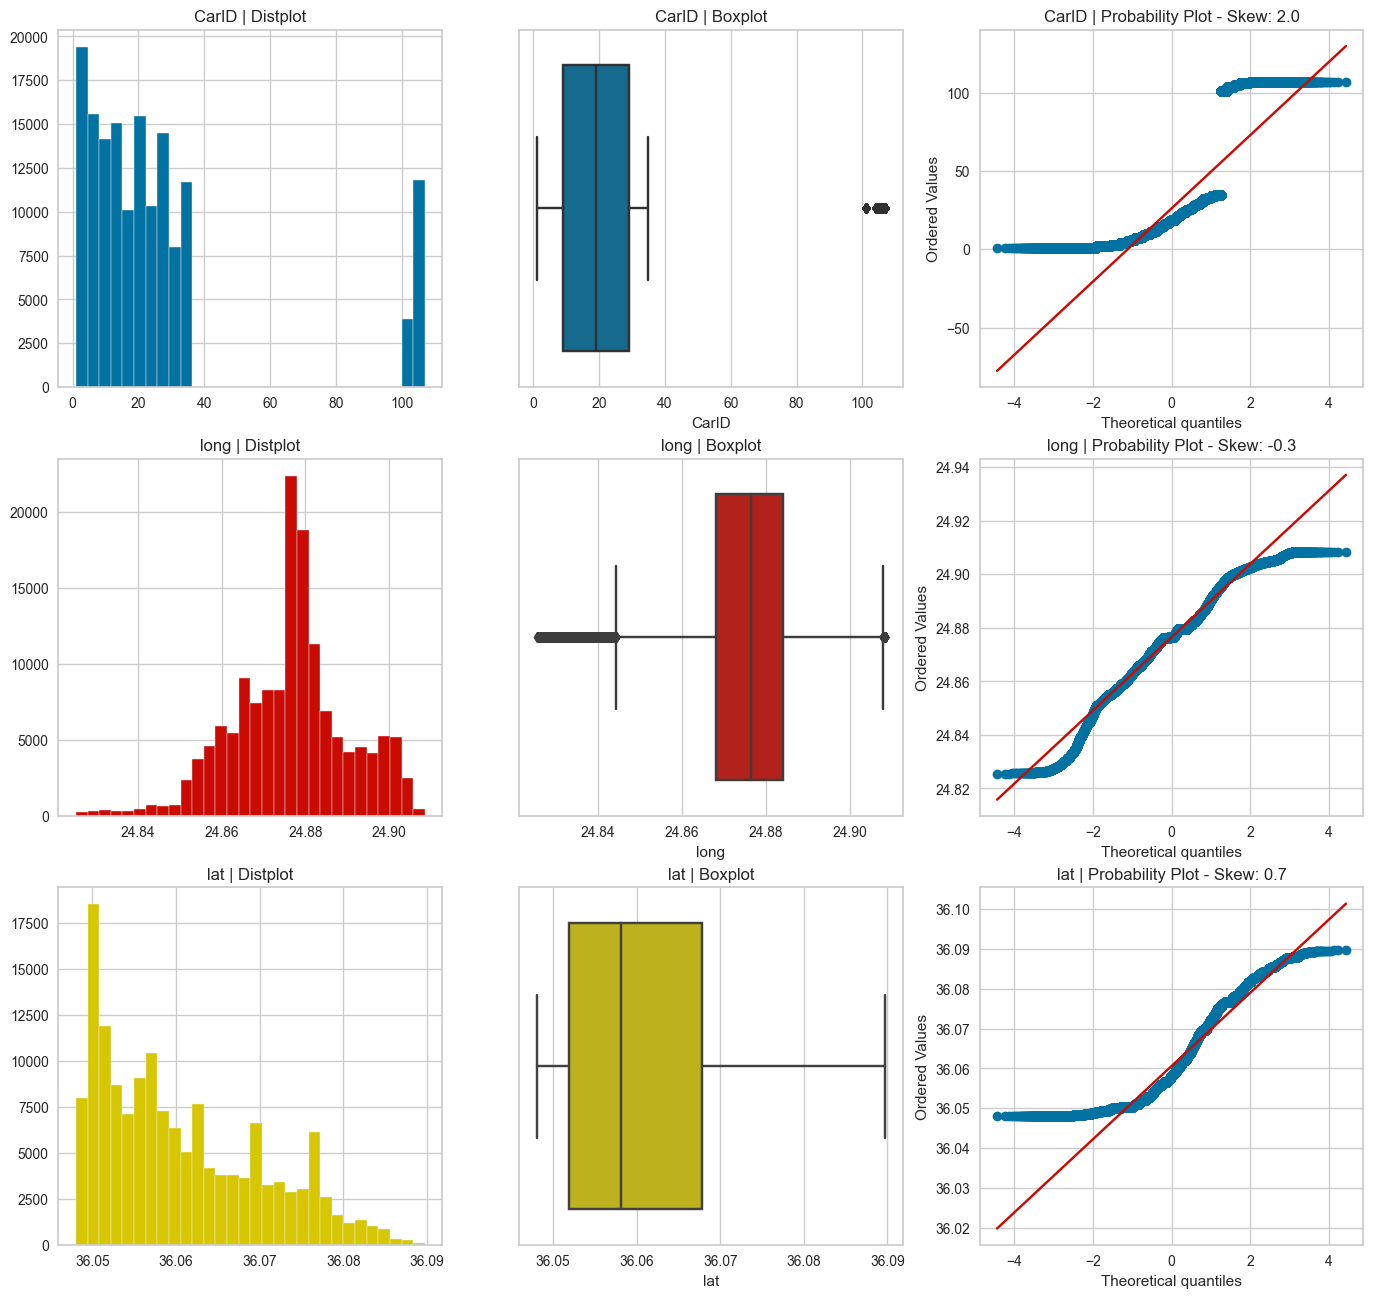

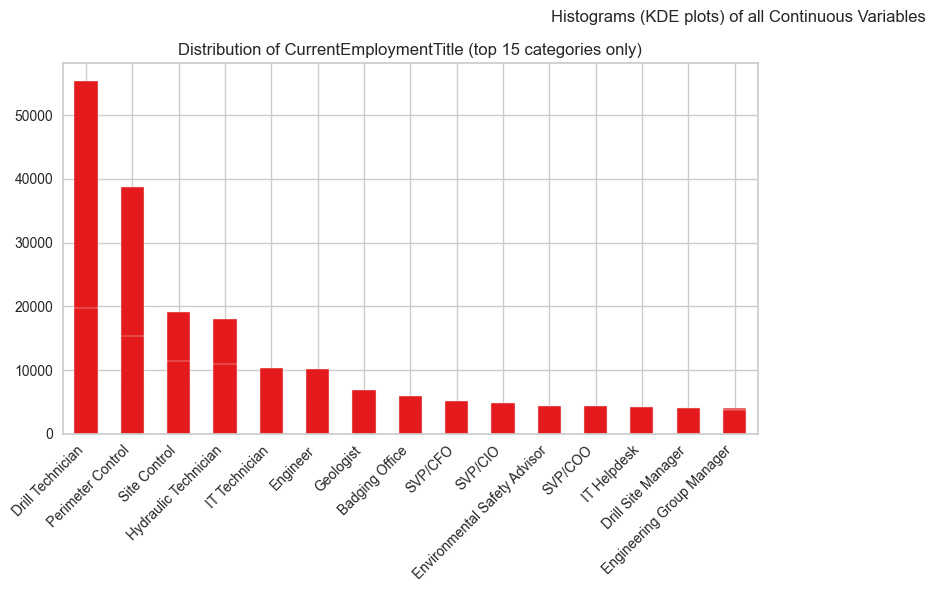

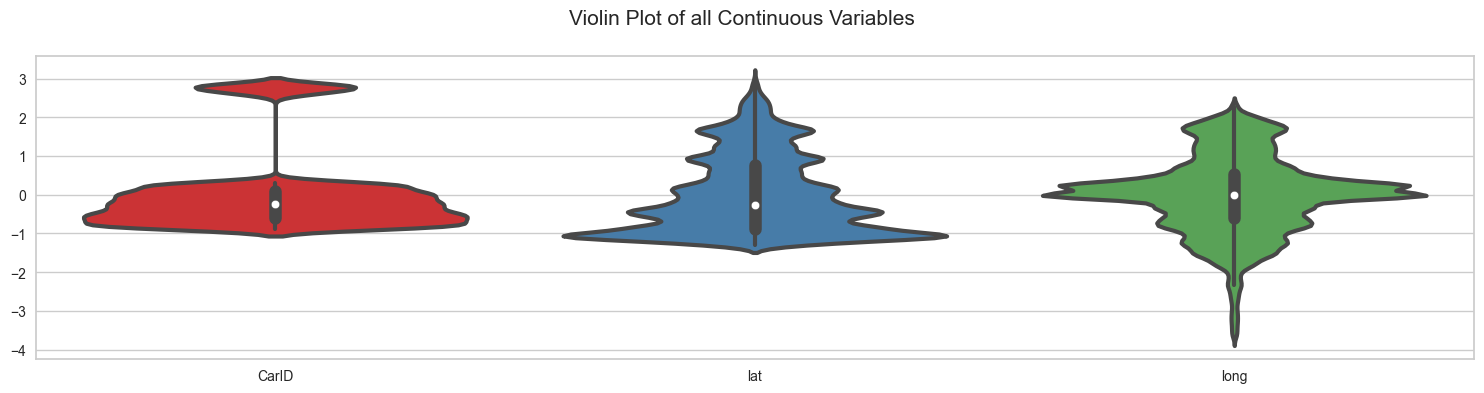

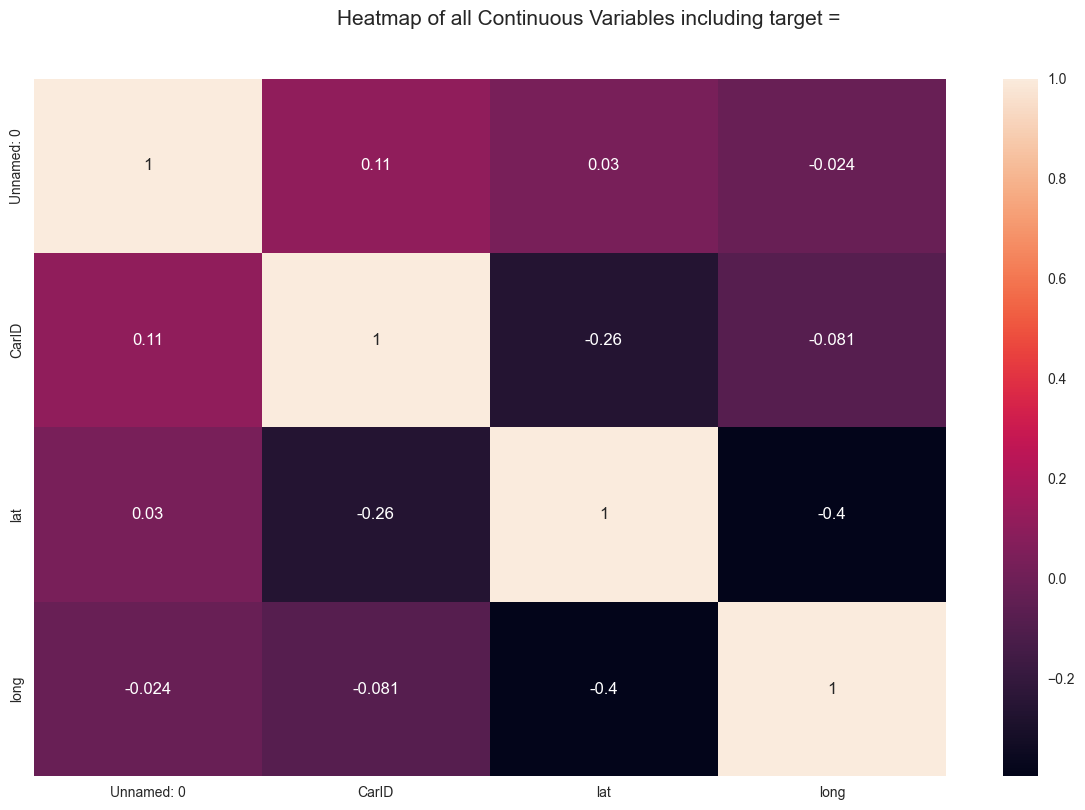

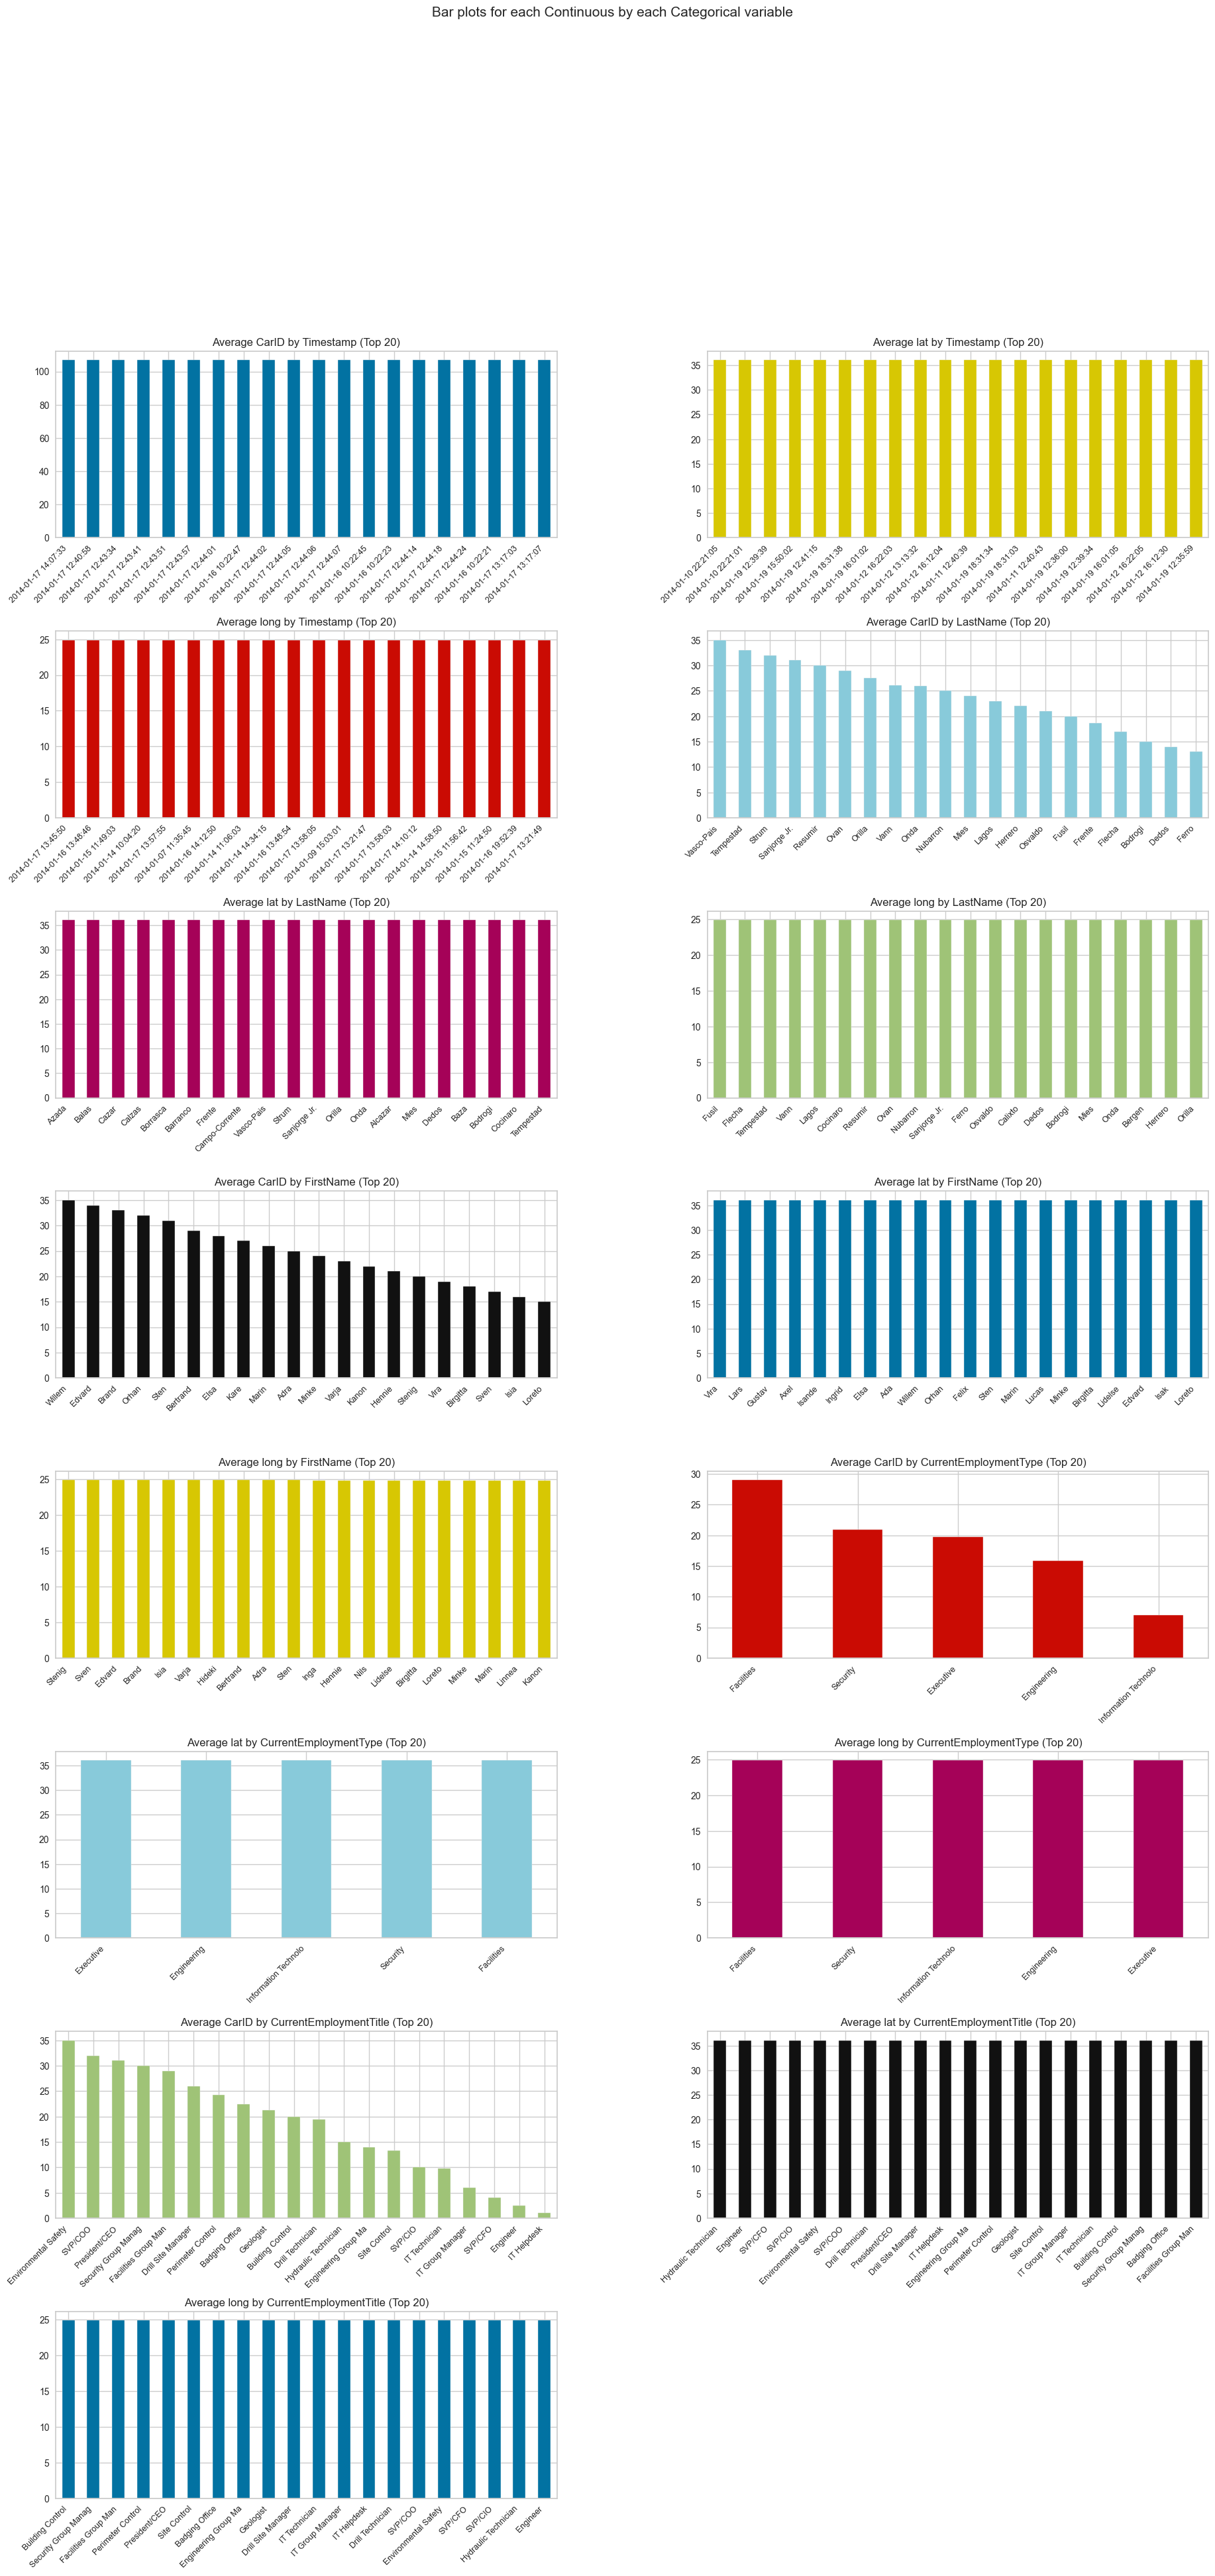

All Plots done
Time to run AutoViz = 5 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


Unnamed: 0            Timestamp  CarID        lat       long  \
86035        86035  2014-01-07 13:39:37   35.0  36.056704  24.863585   
150703      150703  2014-01-08 17:18:51   18.0  36.051935  24.880122   
651348      651348  2014-01-18 12:26:09   10.0  36.068699  24.857113   
174295      174295  2014-01-09 07:53:00    3.0  36.068960  24.874725   
341313      341313  2014-01-13 08:07:33    6.0  36.050949  24.879574   
...            ...                  ...    ...        ...        ...   
5660          5660  2014-01-06 07:43:19  101.0  36.050333  24.840265   
216121      216121  2014-01-09 17:59:35   19.0  36.078048  24.862772   
658126      658126  2014-01-18 13:29:04    9.0  36.063625  24.883012   
3802          3802  2014-01-06 07:33:39    2.0  36.082721  24.852121   
374344      374344  2014-01-13 17:47:11   19.0  36.051225  24.876570   

              LastName FirstName   CurrentEmploymentType  \
86035       Vasco-Pais    Willem               Executive   
150703          Frente  Birgitta             Engineering   
651348  Campo-Corrente       Ada               Executive   
174295           Balas     Felix             Engineering   
341313          Bergen    Linnea  Information Technology   
...                ...       ...                     ...   
5660               NaN       NaN                     NaN   
216121          Frente      Vira             Engineering   
658126          Calzas      Axel             Engineering   
3802             Azada      Lars             Engineering   
374344          Frente      Vira             Engineering   

              CurrentEmploymentTitle  
86035   Environmental Safety Advisor  
150703                     Geologist  
651348                       SVP/CIO  
174295                      Engineer  
341313              IT Group Manager  
...                              ...  
5660                             NaN  
216121          Hydraulic Technician  
658126              Drill Technician  
3802                        Engineer  
374344          Hydraulic Technician  

[150000 rows x 9 columns]

In [9]:
AV = AutoViz_Class()
AV.AutoViz("gps_df.csv")

Shape of your Data Set loaded: (1491, 6)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


    6 Predictors classified...
        1 variables removed since they were ID or low-information variables
        List of variables removed: ['Unnamed: 0']


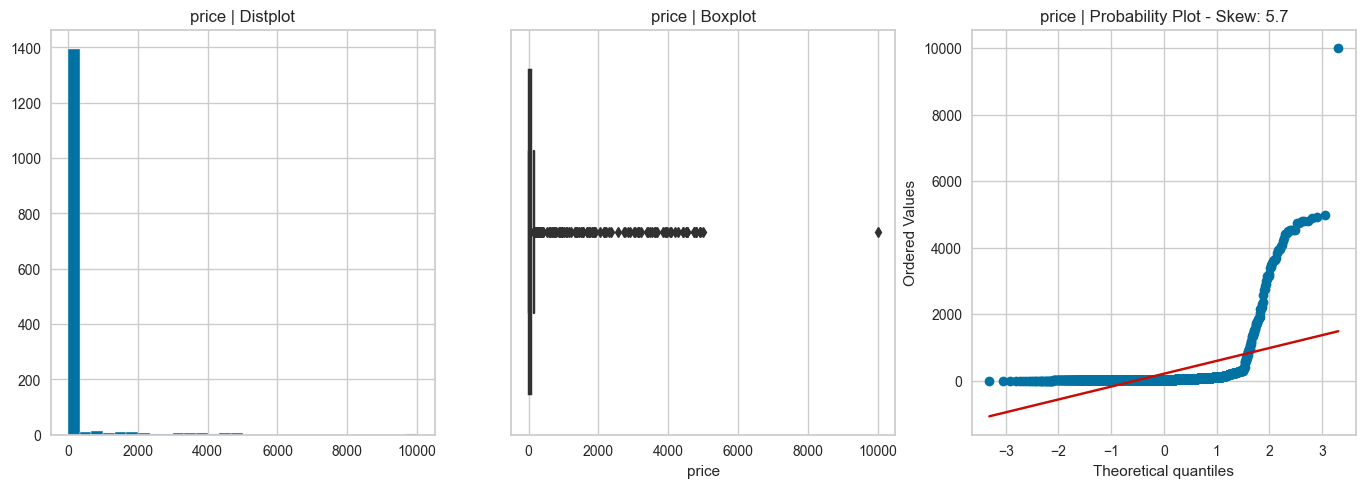

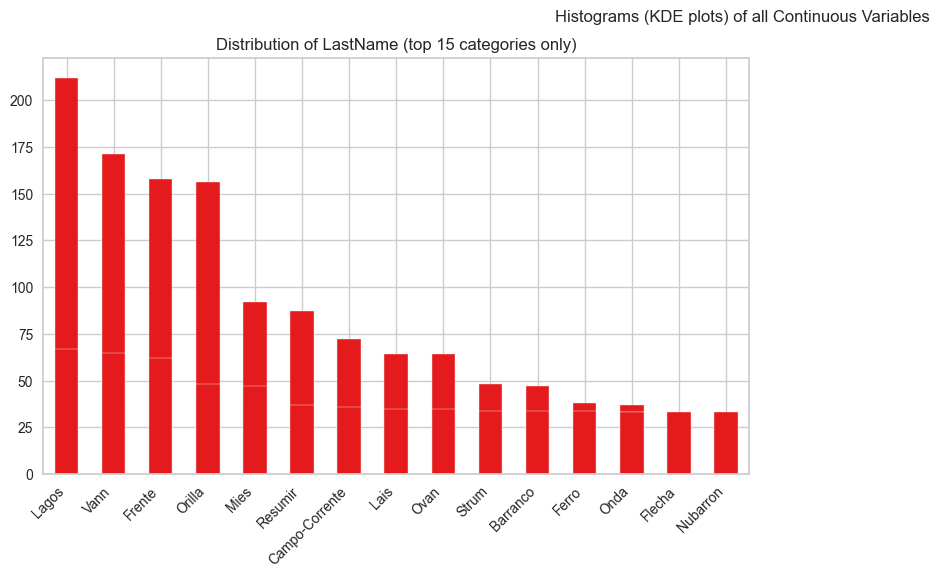

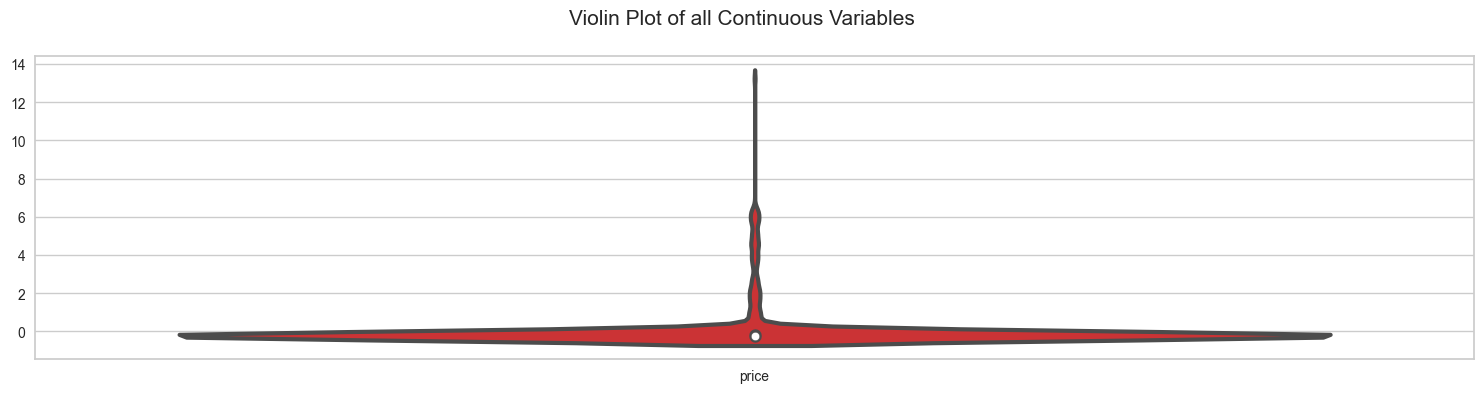

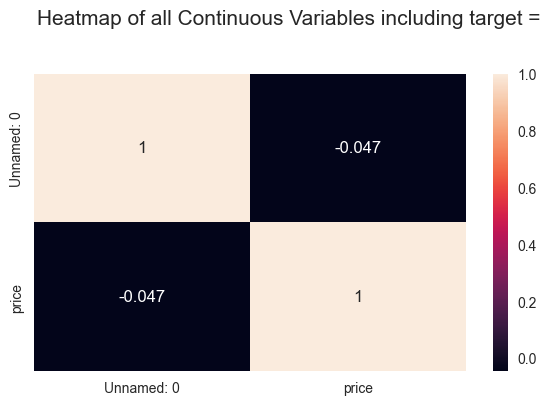

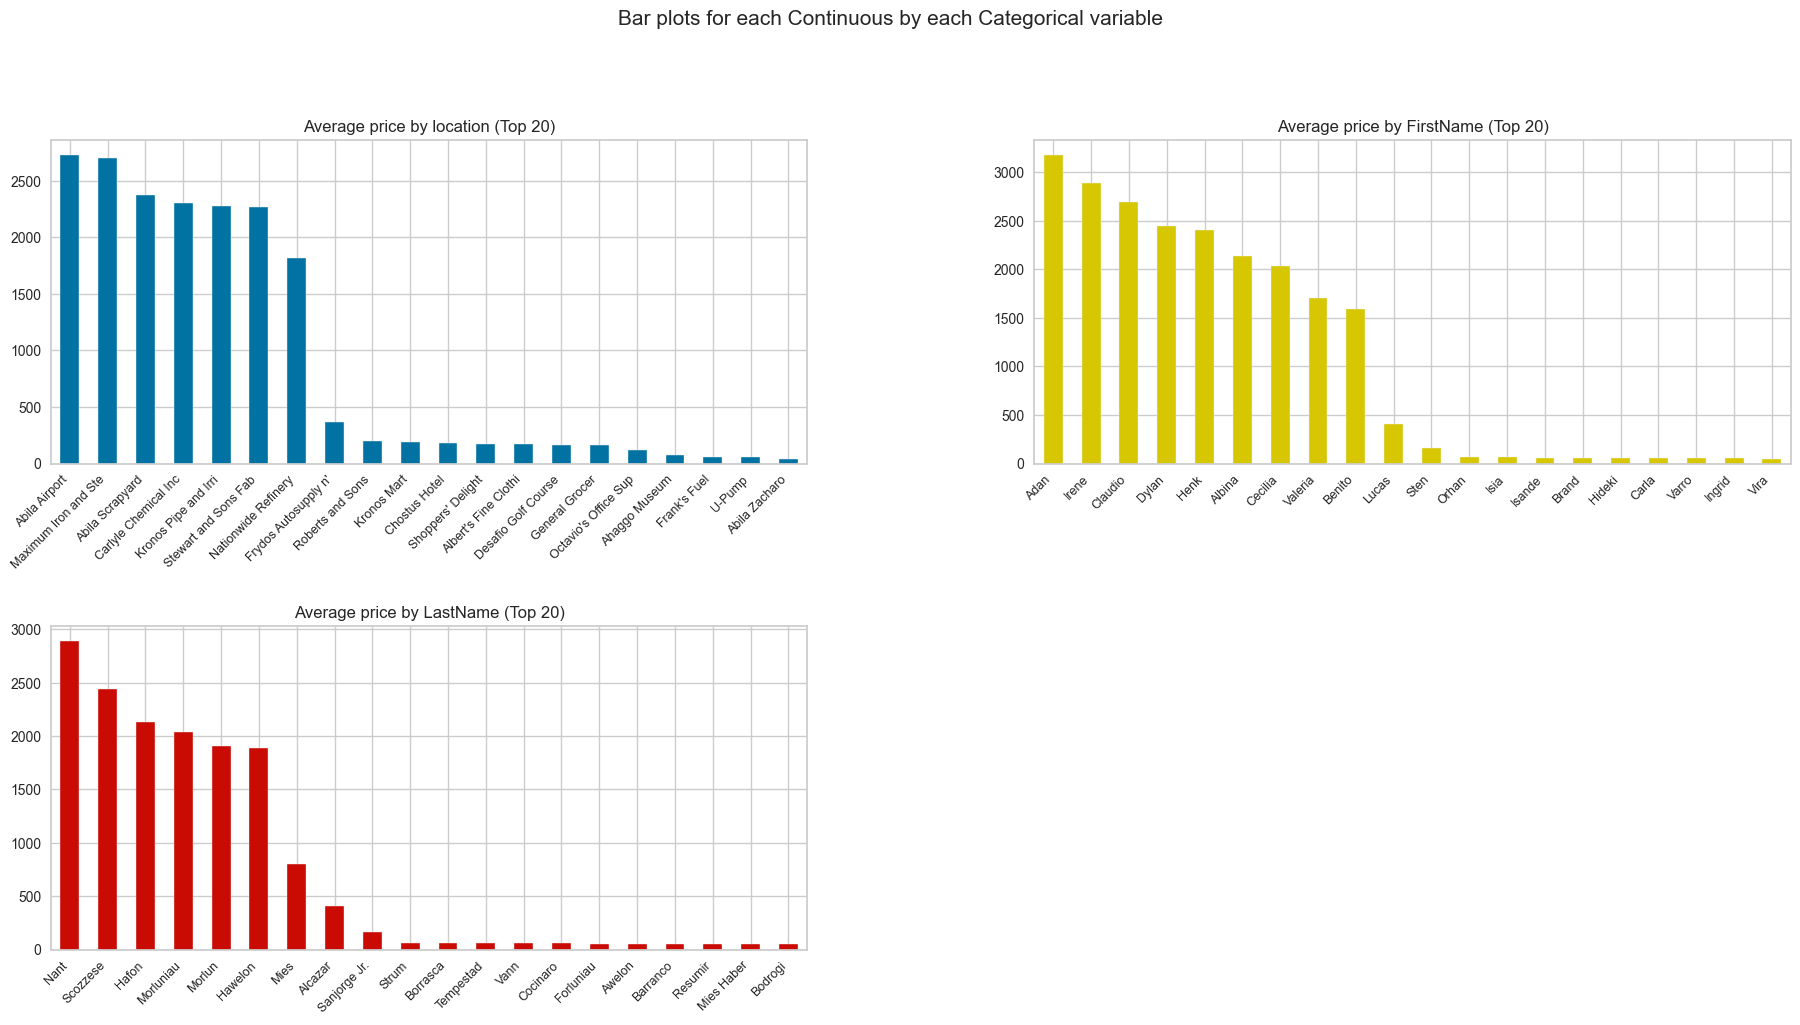

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /Users/i513604/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /Users/i513604/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /Users/i513604/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /Users/i513604/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /Users/i513604/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /Users/i513604/nltk_data...
[nltk_data]    |   Package movie_reviews is a

Could not draw wordcloud plot for timestamp
All Plots done
Time to run AutoViz = 3 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


Unnamed: 0            timestamp             location  price FirstName  \
0              0  2014-01-06 07:28:00  Brew've Been Served  11.34    Edvard   
1              1  2014-01-06 07:34:00     Hallowed Grounds  52.22    Hideki   
2              2  2014-01-06 07:35:00  Brew've Been Served   8.33    Stenig   
3              3  2014-01-06 07:36:00     Hallowed Grounds  16.72  Birgitta   
4              4  2014-01-06 07:37:00  Brew've Been Served   4.24      Sven   
...          ...                  ...                  ...    ...       ...   
1486        1486  2014-01-19 20:16:00          Guy's Gyros  37.48     Brand   
1487        1487  2014-01-19 20:22:00      Katerina’s Café  38.90  Birgitta   
1488        1488  2014-01-19 20:25:00          Guy's Gyros  20.94    Loreto   
1489        1489  2014-01-19 20:30:00          Guy's Gyros  31.94     Minke   
1490        1490  2014-01-19 20:51:00          Guy's Gyros  39.60     Felix   

       LastName  
0          Vann  
1      Cocinaro  
2         Fusil  
3        Frente  
4        Flecha  
...         ...  
1486  Tempestad  
1487     Frente  
1488    Bodrogi  
1489       Mies  
1490    Resumir  

[1491 rows x 6 columns]

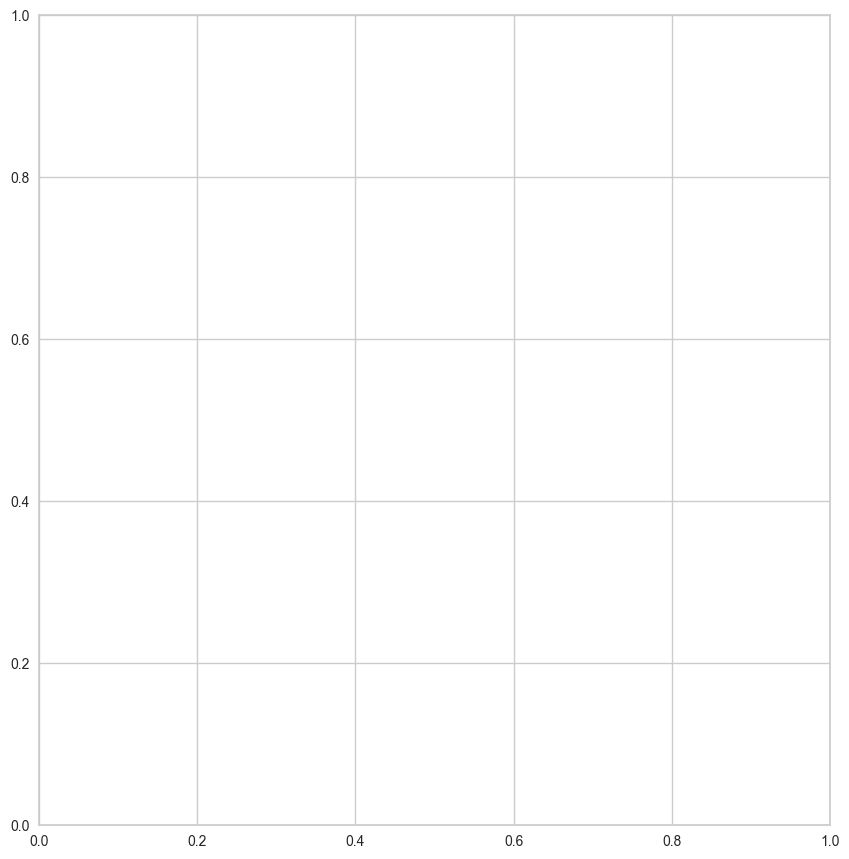

In [10]:
AV.AutoViz("credit_df.csv")

Shape of your Data Set loaded: (1393, 6)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


    6 Predictors classified...
        1 variables removed since they were ID or low-information variables
        List of variables removed: ['Unnamed: 0']


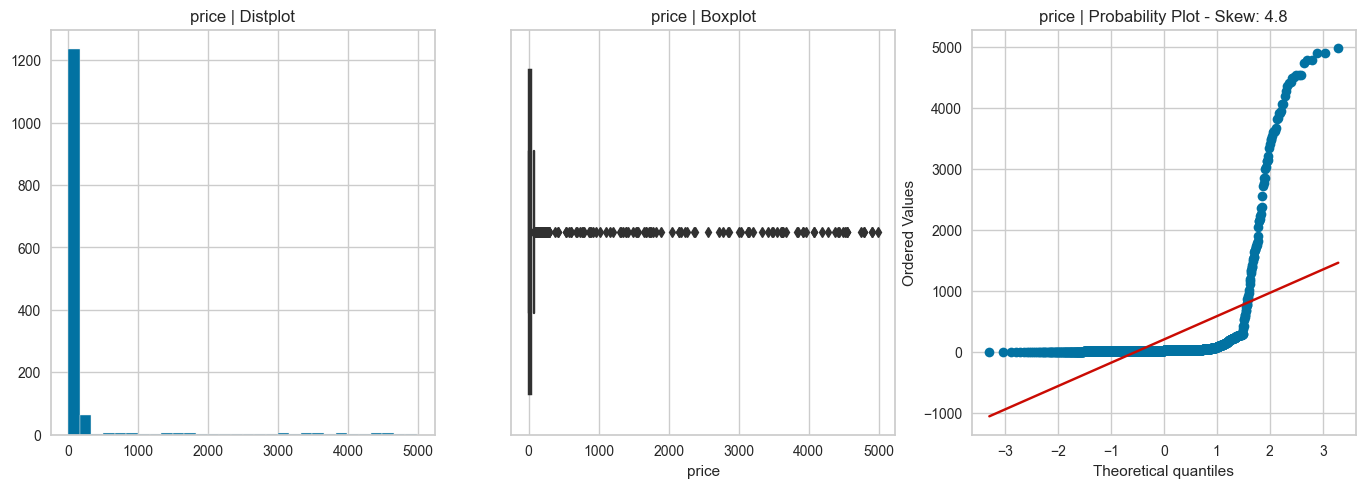

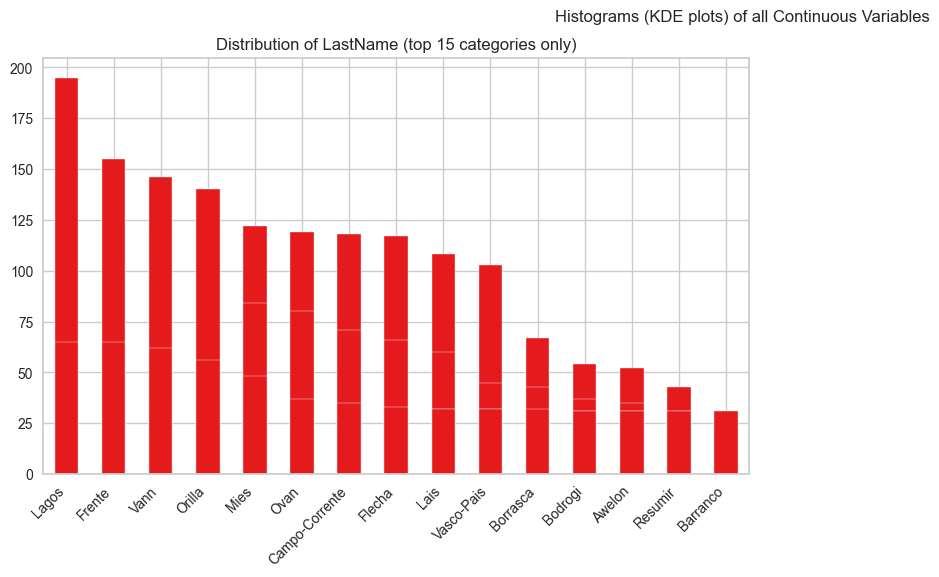

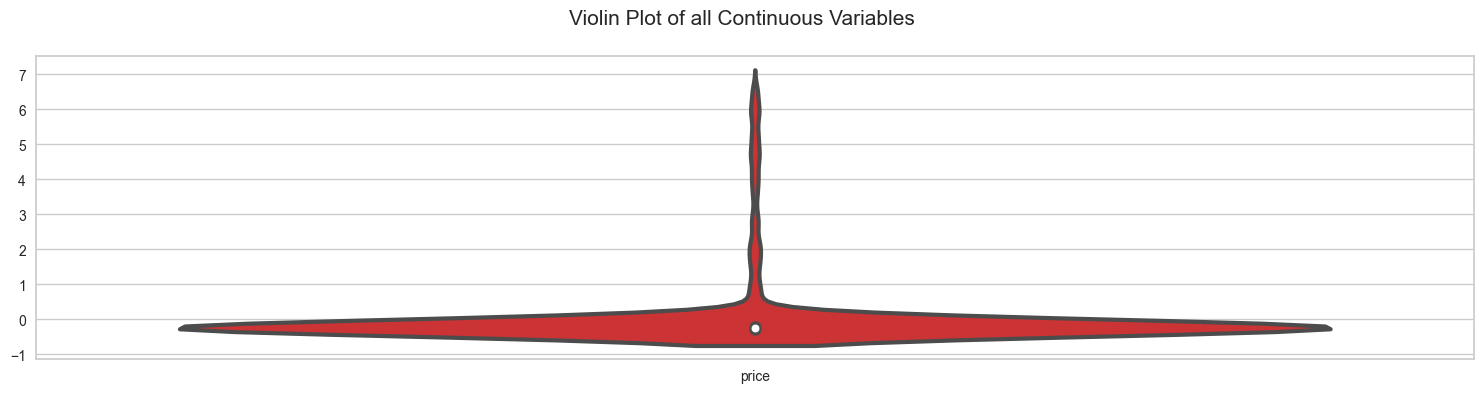

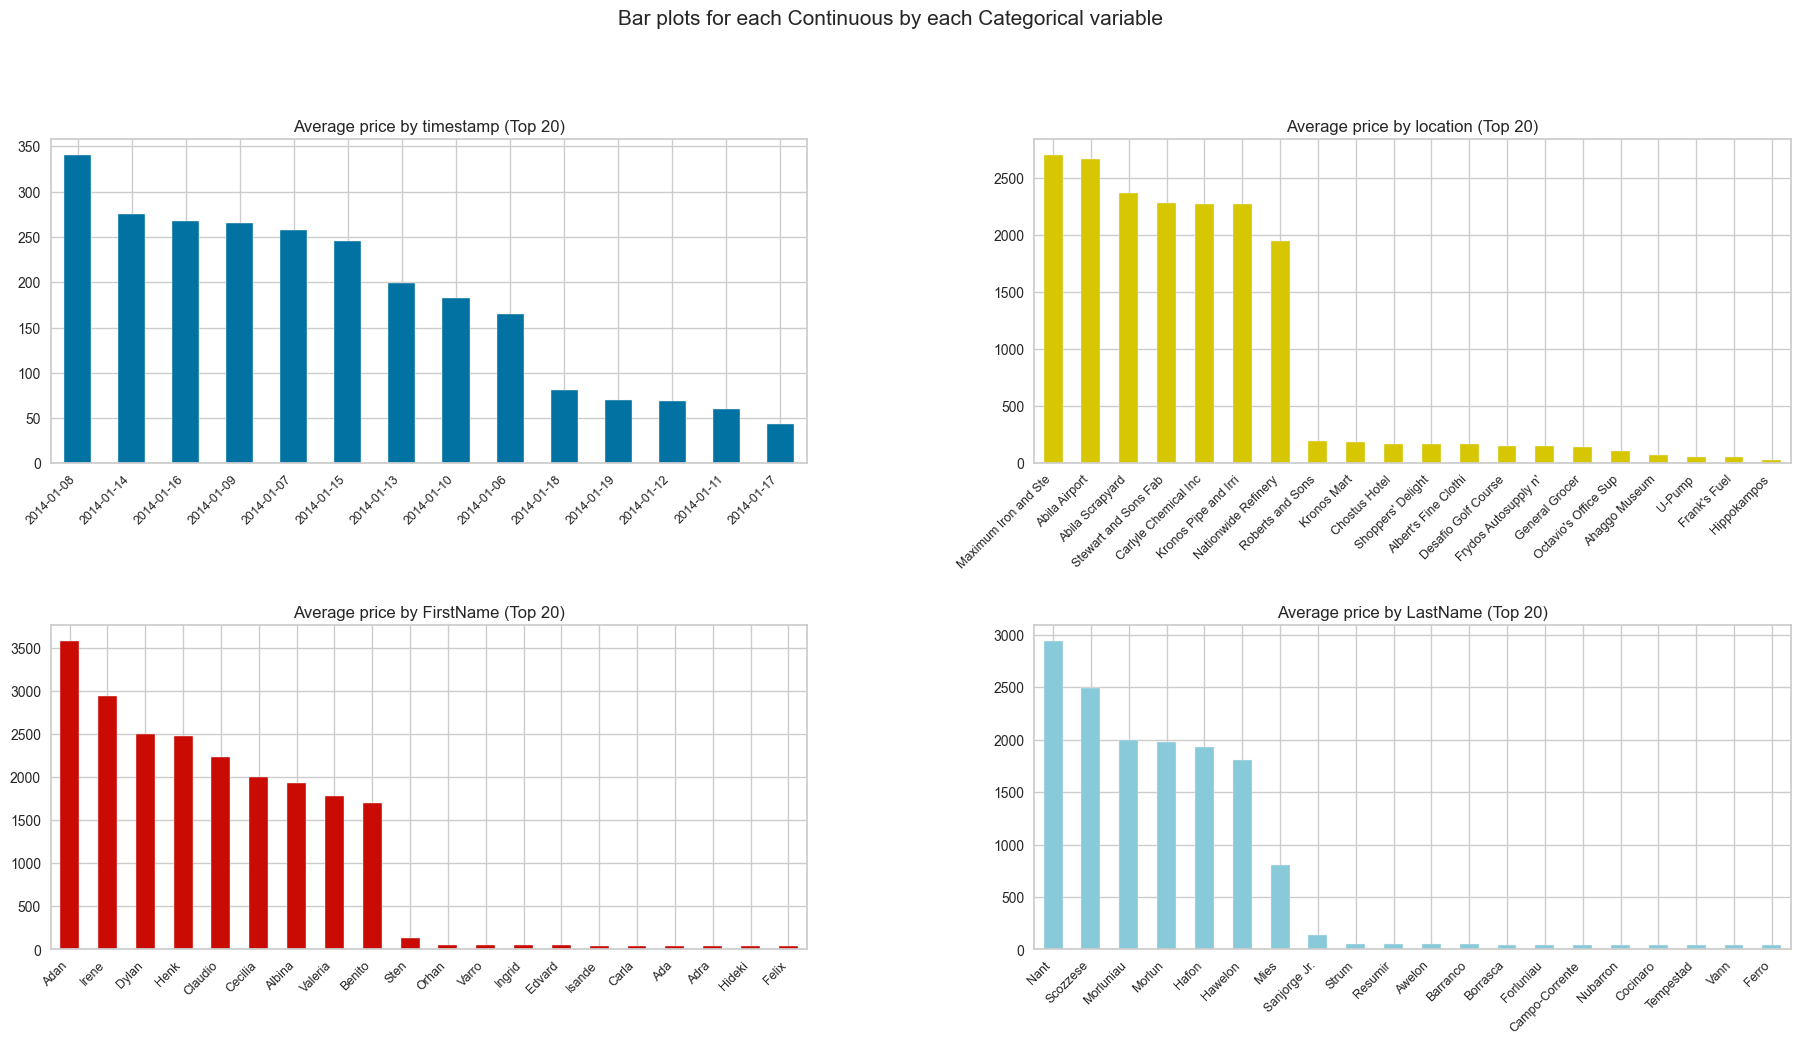

All Plots done
Time to run AutoViz = 1 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


Unnamed: 0   timestamp             location   price FirstName  \
0              0  2014-01-06  Brew've Been Served    4.17  Cornelia   
1              1  2014-01-06  Brew've Been Served    9.60       Mat   
2              2  2014-01-06     Hallowed Grounds   16.53     Emile   
3              3  2014-01-06         Coffee Shack   11.51     Varro   
4              4  2014-01-06     Hallowed Grounds   12.93    Rachel   
...          ...         ...                  ...     ...       ...   
1388        1388  2014-01-19      Katerina’s Café   70.22    Edvard   
1389        1389  2014-01-19          Guy's Gyros   18.08      Isia   
1390        1390  2014-01-19      Katerina’s Café   35.01      Isia   
1391        1391  2014-01-19  Desafio Golf Course  110.02    Willem   
1392        1392  2014-01-19          Hippokampos   63.17    Willem   

        LastName  
0           Lais  
1         Bramar  
2           Arpa  
3         Awelon  
4       Pantanal  
...          ...  
1388        Vann  
1389        Vann  
1390        Vann  
1391  Vasco-Pais  
1392  Vasco-Pais  

[1393 rows x 6 columns]

In [11]:
AV.AutoViz("loyalty_df.csv")

## Prompt 1: Describe common daily routines for GAStech employees.
What does a day in the life of a typical GAStech employee look like?

In [99]:
employees = car_gps_df['FirstName'] + " " + car_gps_df['LastName']
employees.append(loyalty_data['FirstName'] + " " + loyalty_data['LastName'])
employees.append(credit_data['FirstName'] + " " + credit_data['LastName'])
emp_ids = pd.DataFrame(data=employees.unique(), columns=['name'])
emp_ids['ID'] = emp_ids.index
emp_ids

name  ID
0    Willem Vasco-Pais   0
1      Ingrid Barranco   1
2          Vira Frente   2
3   Ada Campo-Corrente   3
4      Isande Borrasca   4
5          Edvard Vann   5
6          Orhan Strum   6
7         Gustav Cazar   7
8          Sven Flecha   8
9      Hideki Cocinaro   9
10     Birgitta Frente  10
11        Stenig Fusil  11
12           Isia Vann  12
13       Linnea Bergen  13
14         Felix Balas  14
15          Marin Onda  15
16       Lucas Alcazar  16
17       Bertrand Ovan  17
18      Hennie Osvaldo  18
19     Brand Tempestad  19
20       Lidelse Dedos  20
21          Inga Ferro  21
22          Lars Azada  22
23         Kare Orilla  23
24                 NaN  24
25        Nils Calixto  25
26          Minke Mies  26
27       Adra Nubarron  27
28         Varja Lagos  28
29       Felix Resumir  29
30      Loreto Bodrogi  30
31         Elsa Orilla  31
32           Isak Baza  32
33       Kanon Herrero  33
34         Axel Calzas  34
35   Sten Sanjorge Jr.  35

In [113]:
car_gps_df['Date'] = car_gps_df['Timestamp'].map(lambda x: x.date())
car_gps_df.sort_values(by='Timestamp', inplace=True)
car_gps_df['empID'] = car_gps_df.apply(lambda x: emp_ids[emp_ids['name'] == (x['FirstName'] + " " + x['LastName'])]['ID'], axis=1)
car_gps_df.head()

TypeError: unsupported operand type(s) for +: 'float' and 'str'

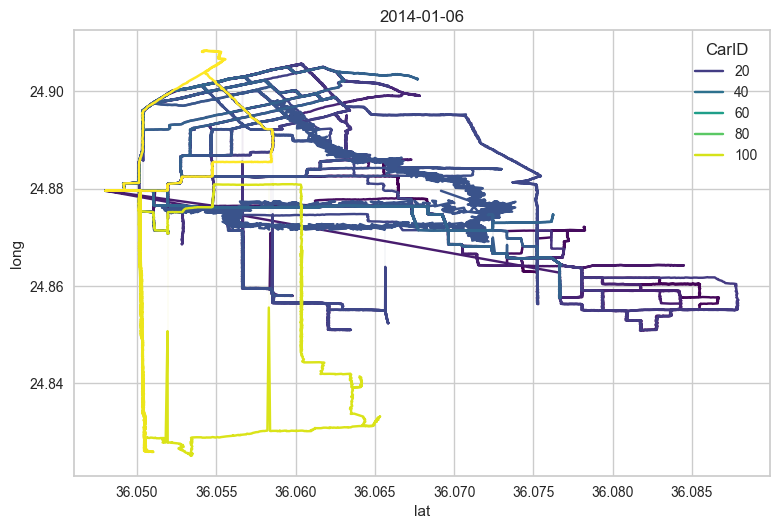

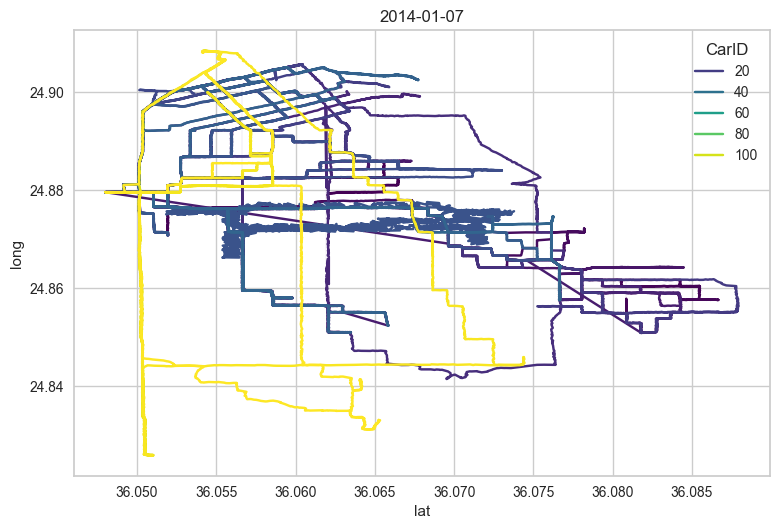

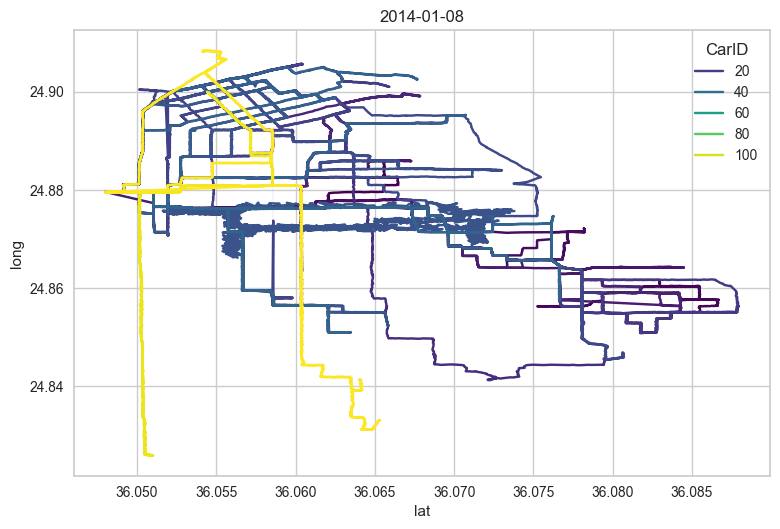

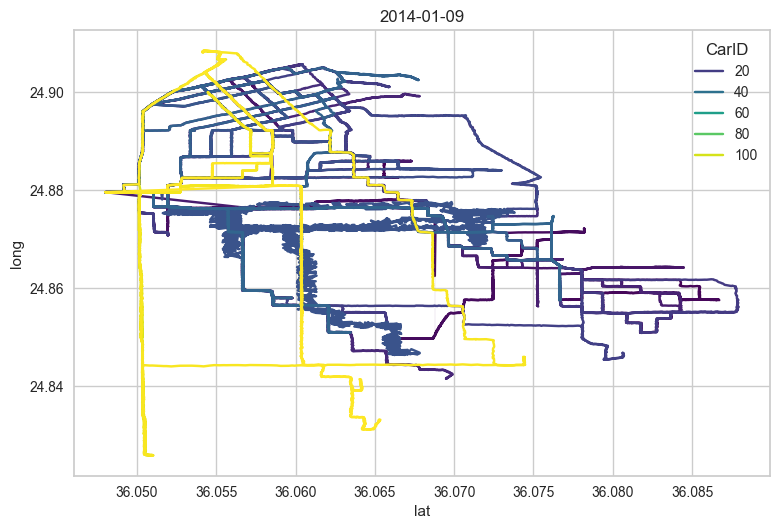

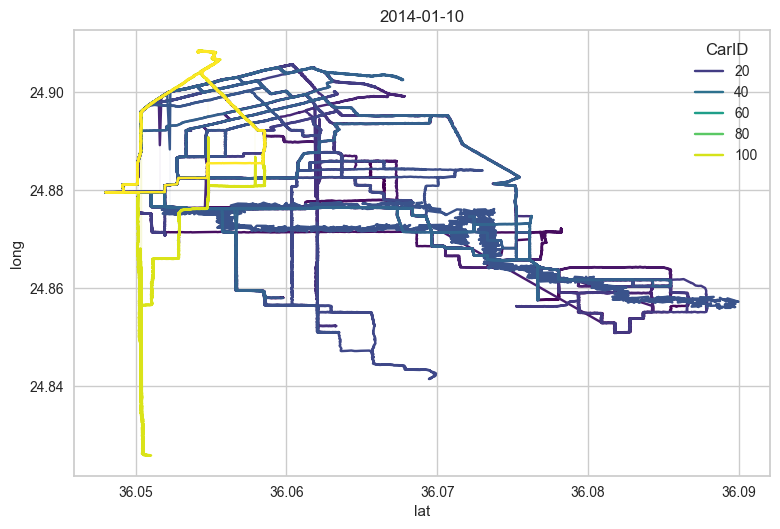

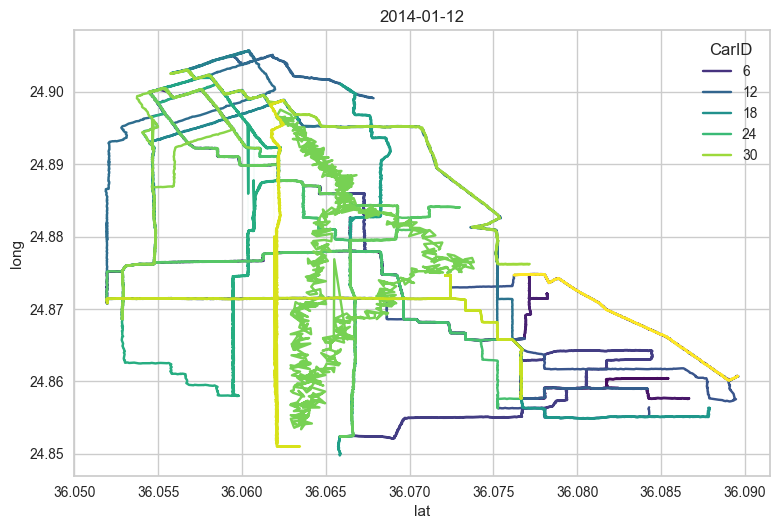

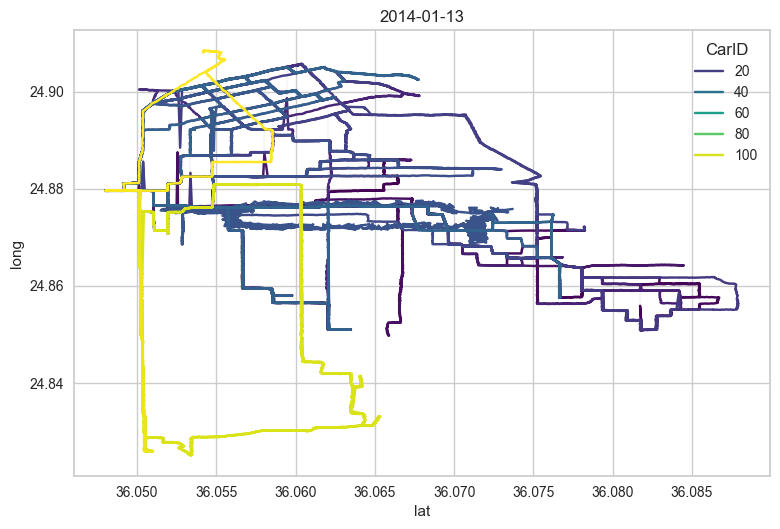

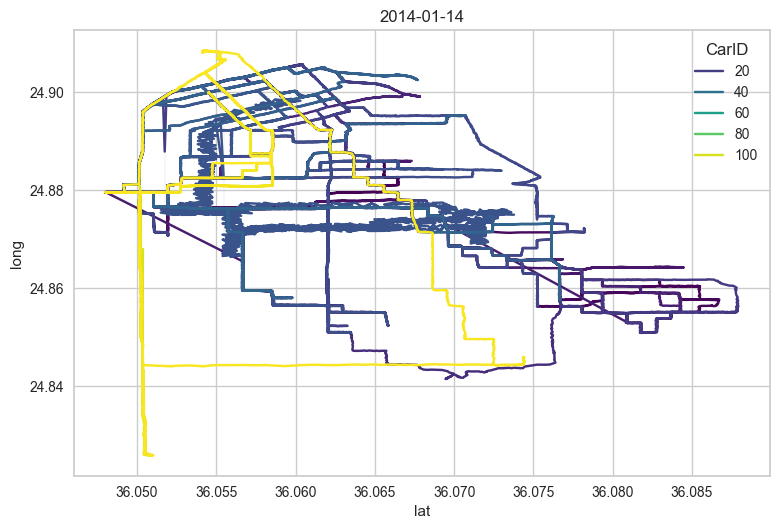

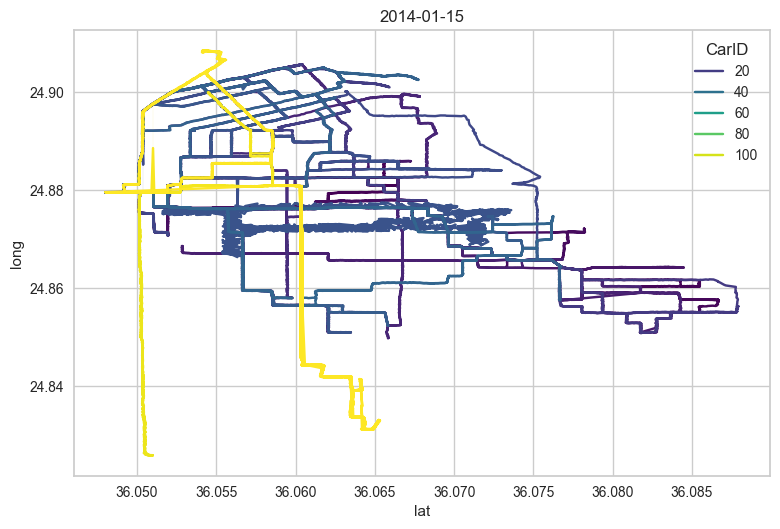

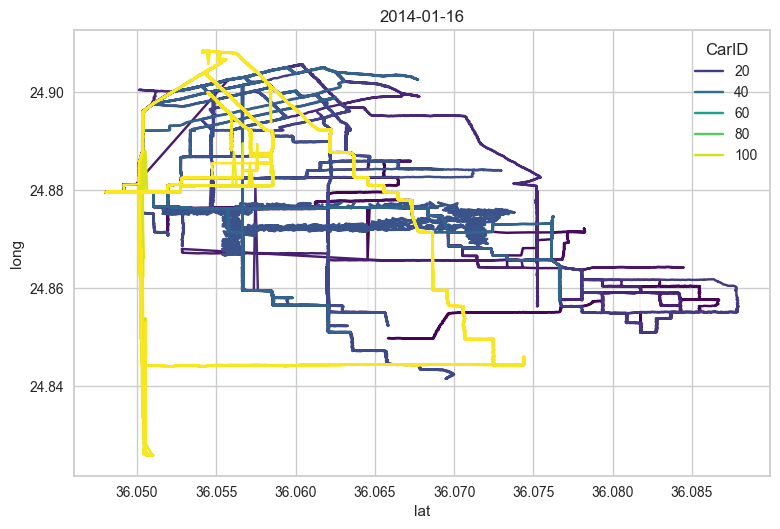

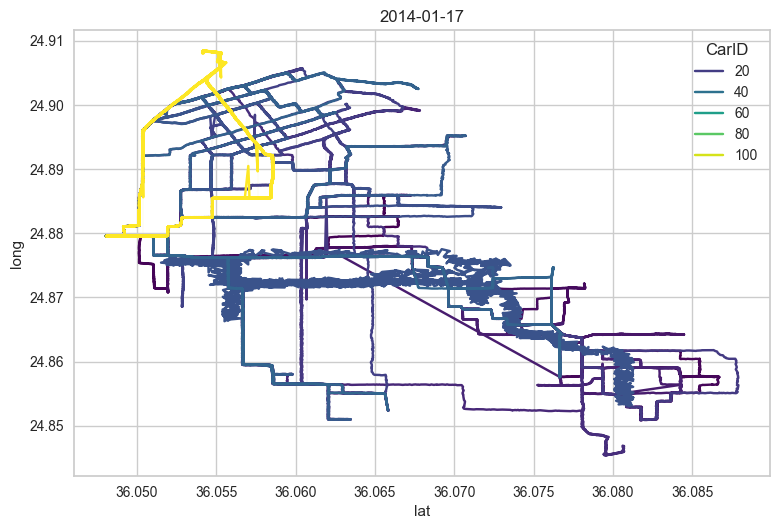

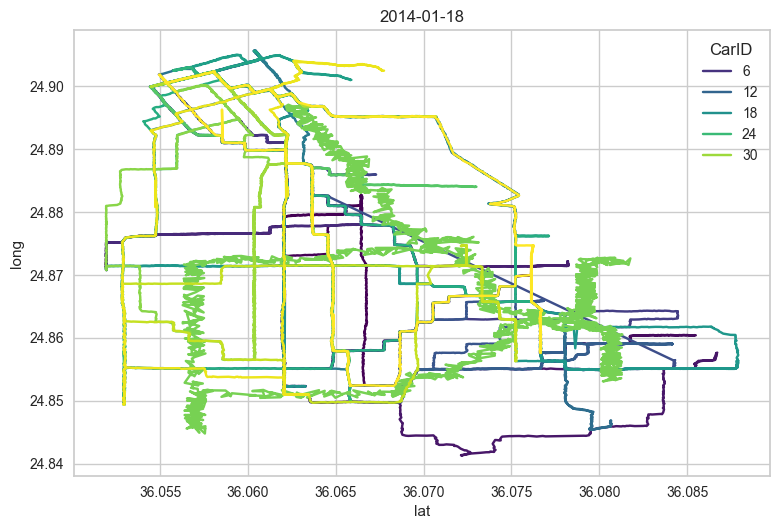

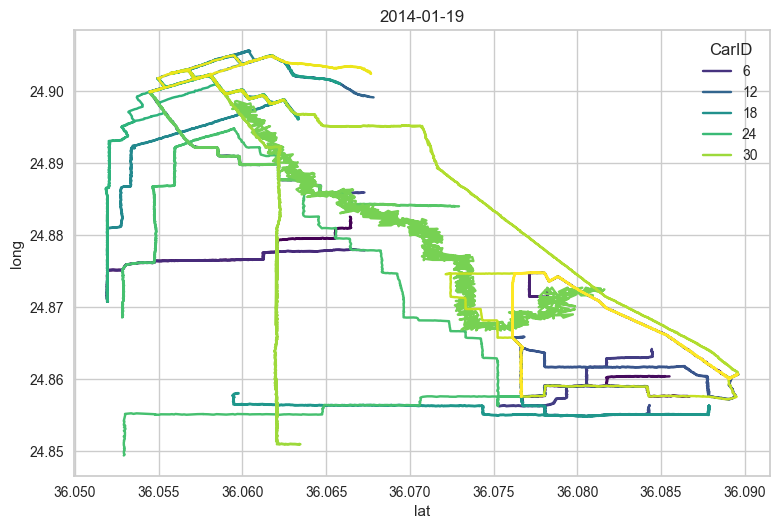

In [81]:
dates = car_gps_df['Date'].unique()
for i in range(14):
    plt.figure()
    sns.lineplot(x=car_gps_df[car_gps_df['Date'] == pd.to_datetime(dates[i])]['lat'], y=car_gps_df[car_gps_df['Date'] == pd.to_datetime(dates[i])]['long'], hue=car_gps_df[car_gps_df['Date'] == pd.to_datetime(dates[i])]['CarID'], palette='viridis', sort=False)
    plt.title(dates[i])
    plt.show()